

# Project: No-Show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> The dataset consist of information of over 100,000 scheduled medical appointments in Brazil saved as a csv file. It focused on whether patients turned up for their appointments or not. There are 14 columns. The column names and their meanings are stated below:
    
>1. PatientId - Patient ID       
2. AppointmentID - Appointment ID
3. Gender - Patient Gender
4. ScheduledDay	- Scheduled Day
5. AppointmentDay - Appointment Day
6. Age - Patient's age
7. Neighbourhood - The Appointment Region
8. Scholarship- If the patient is a beneficiary of a form of financial support given to Brazilian citizens to reduce poverty and encourage education
9. Hipertension-If the patient has Hypertension or not
10. Diabetes- If the patient has Diabetes or not 
11. Alcoholism- If the patient is an alcoholic or not 
12. Handcap- If patient is Handicap
13. SMS_received- If one or more messages were sent to the patient or not
14. No-show- If patient did not show up for appointment



### Question(s) for Analysis

> * What factors should we consider that might predict if a patient will show up for an appointment or not?

   > Possible Subquestions:
   * What is the relationship between these factors and patients showing up?
   * What factor(s) have the greatest influence on showing up?
   * What factor(s) show no direct correlation with showing up?


In [361]:
# Importing packages:

# pandas, numpy and matplotlib will be used in exploring the dataset, they are imported as below:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 2.3MB/s eta 0:00:01   4% |█▌                              | 450kB 17.8MB/s eta 0:00:01    13% |████▌                           | 1.3MB 19.1MB/s eta 0:00:01    24% |███████▉                        | 2.3MB 18.7MB/s eta 0:00:01    34% |███████████                     | 3.3MB 18.9MB/s eta 0:00:01    62% |████████████████████            | 5.9MB 19.0MB/s eta 0:00:01    72% |███████████████████████▏        | 6.9MB 19.8MB/s eta 0:00:01    82% |██████████████████████████▎     | 7.8MB 20.0MB/s eta 0:00:01    92% |█████████████████████████████▌  | 8.8MB 19.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   12% |███▉                            | 1.6MB 21.9MB/s eta 0:00:01    26% |████████▌                       | 3.6MB 19.5MB/s eta 0:00:01    40% |█████████████                   | 5.5MB 18.7MB/s eta 0:00:01    54% |█████████████████▍              | 7.3MB 16.4MB/s eta 0:00:01    81% |██████████████████████████

<a id='wrangling'></a>
## Data Wrangling


### Loading and Inspecting Data

In [362]:
# Loading and inspecting data
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Dataframe head shows 14 columns

In [363]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


- Dataframe tail shows 14 columns. The last entry has index number 110526

In [364]:
# Checking data shape

df.shape

(110527, 14)

- The dataframe has 110527 rows and 14 columns

In [365]:
# Checking number of duplicated items

df.duplicated().sum()

0

- There are no duplicated rows in the data

In [366]:
# Checking number of unique values in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- There are 62299 unique Patient IDs
- There are 110527 unique Appointment IDs
- There are 103549 unique ScheduledDay values
- There are 104 unique Age inputs
- There are 81 unique Neighbourhood entries
- There are 27 unique Appointment Days
- The other variables have 2 unique values each

In [367]:
# Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There are no obvious missing values in the data
- The columns have varying data types

In [368]:
# Checking Summary statistics of the dataframe

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The mean age is 37 years
- The minimum age is -1. This has to be further explored and appropriately rectified
- People older than 37 years constitute about 50% of the population

In [369]:
# To find unique values in each column of the dataframe

for col in df:
 print(col)
 print(df[col].unique())

PatientId
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender
['F' 'M']
ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age


- This shows the unique values in each column
- There are Age values -1 and 0
- Handcap has five values differing from the data source stating that it has 2 values- True and False




### General overview of the data

* There are 110527 rows and 14 variables entered into columns
* There are 62299 patients who scheduled the appointments
* There are 81 locations where the appointments took place
* There appears to be no missing data and no duplicates amongst the variables
* Most of the variables are stored as integers while one is as float and another as object
* Appropriate change of the data types might be needed to properly interprete the data
* The minimum Age seems to be -1. Mean age of 37, there are more older people in the country. The Age column needs to be explored to appropriately clean the data





### Data Interpretation

1. PatientId - Patient ID	


2. AppointmentID - Appointment ID


3. Gender - Patient's Gender as M- Male or F- Female



4. ScheduledDay	- Day appointment was scheduled



5. AppointmentDay - Day appointment was to hold



6. Age - Patient's Age


7. Neighbourhood - Neighbourhood where the appointments held



8. Scholarship- This is a form of financial support given to Brazilian citizens to reduce poverty and encourage eduation
    
    Interpreted as: 0- Not on scholarship, 1- On scholarship



9. Hipertension-If the patient has Hypertension or not
    
    Interpreted as : 0- False(without Hypertension), 1- True (with hypertension)


10. Diabetes- If the patient as Diabetes or not
 
    Interpreted as : 0- False(without Diabetes), 1- True (with Diabetes) 


11.  Alcoholism- If the patient is an alcoholic or not

    Interpreted as : 0- False(Not an alcoholic), 1- True (an alcoholic) 


12. Handcap- If patient is Handicap

    Difficult to interpret as there are 5 unique values (0-4) while the data source says -True or False
    .The column will be further explored to be cleaned or dropped


13. SMS_received- If one or more messages were sent to the patient

    Interpreted as : 0- False(no messages were sent), 1- True (one or more messages were sent) 


14. No-show- If patient did not show up for appointment
    
    Interpreted as : No- Patient showed up, Yes- Patient did not show up


### Data Cleaning

The identified problems with the data include:
- The minimum age is showing as  '-1'
- Presence of columns that will not contribute to analysis
- Improper spelling of column names
- Data types that need to be changed


How to handle the problems?

<ul>
<li><a href="#inv_age">Investigating And Cleaning Age Column</a></li>
<li><a href="#dropcol">Dropping Columns</a></li>
<li><a href="#Rencol">Renaming Columns</a></li>
<li><a href="#Chngdtyp">Changing DataTypes</a></li>
</ul>


 

<a id='inv_age'></a>
**Investigating And Cleaning '_Age_' Column**

In [370]:
# Investigate Age showing as -1

df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [371]:
# Check all values in Age
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


- There are 3539 values of Age stored as 0 and one value of Age stored as -1
- These values totalling 3540 in number will be replaced by the mean Age as below

In [372]:
# Calculate mean Age
df.Age.mean()

37.08887421173107

In [373]:
# Replace rows with Age as 0 and -1 with mean age

df['Age'].replace([0, -1], df.Age.mean(), inplace=True)

- The Ages with 0 and -1 values have been replaced with the mean age

In [374]:
# Check values in Age

df.Age.value_counts()

37.088874     3540
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
              ... 
98.000000        6
115.000000       5
100.000000       4
102.000000       2
99.000000        1
Name: Age, Length: 103, dtype: int64

- The Age column now has no 0 and -1 values, the minimum Age is now 1

In [375]:
# Check Data Description

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The mimimum Age is now 1
- The mean Age has changed from 37 to 38. 
- This change in mean should be noted as one of the limitations of the data analysis process

In [376]:
# Check Replacement of Age -1 values

df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [377]:
# Checking Replacement by using the index of the -1 value 

df.iloc[[99832]]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,37.088874,ROMÃO,0,0,0,0,0,0,No


- The index of the -1 value was checked in a few cells above. The cell has the comment **# Investigate Age showing as -1**
- The Cell directly above shows that the -1 value has been replaced with the mean Age value

<a id='dropcol'></a>
**Dropping Columns**

In [378]:
# Checking the Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 11.8+ MB


- PatientId and AppointmentID columns would not contribute much to the data analysis hence will be dropped
- As was noted earlier, the Handcap column has five values 0,1,2,3,4 differing from the True and False Values stated in the Data source hence it will be dropped

In [379]:
# Explore Handcap
# Checking Handcap rows with value of 4

df[df.Handcap ==4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15.0,DA PENHA,0,0,0,0,4,0,No
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19.0,SÃO PEDRO,0,0,0,0,4,0,No
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9.0,ITARARÉ,0,0,0,0,4,1,Yes


In [380]:
# Drop columns PatientId, AppointmentID and Handcap

df.drop([ 'PatientId', 'AppointmentID', 'Handcap'], axis= 1, inplace=True)


- The columns PatientId, AppointmentID and Handcap have been dropped

In [381]:
# Checking dropped columns

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,No


- The columns were checked to confirm the drop

<a id='Rencol'></a>
**Renaming Columns**

In [382]:
# Renaming Columns - Some columns will be renamed to correct spelling errors and to ensure consistency
# 'ScheduledDay' to 'Scheduled_Day', 'AppointmentDay' to 'Appointment_Day', 'Hipertension' to 'Hypertension', and 'No-show' to'No_show'

df.rename(columns={'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension', 'No-show':'No_show'}, inplace=True)
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,No


- The renaming process has been confirmed

<a id='Chngdtyp'></a>
**Changing DataTypes**

In [383]:

# Explore data types and data validity

df.dtypes

Gender              object
Scheduled_Day       object
Appointment_Day     object
Age                float64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
SMS_received         int64
No_show             object
dtype: object

In [384]:
# Explore SMS_received

df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [385]:
# Check unique values in Gender column

df.Gender.unique()

array(['F', 'M'], dtype=object)

In [386]:
# To check the unique values of each column and see if they are appropriate for their datatype

for col in df:
 print(col)
 print(df[col].unique())

Gender
['F' 'M']
Scheduled_Day
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
Appointment_Day
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age
[ 62.          56.           8.          76.          23.
  39.          21.          19.          30.          29.
  22.          28.          54.          15.          50.

In [387]:
# Check datatypes again

df.dtypes

Gender              object
Scheduled_Day       object
Appointment_Day     object
Age                float64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
SMS_received         int64
No_show             object
dtype: object

In [388]:
# Change Scheduled_Day and Appointment_Day from string/object to datetime datatype


In [389]:
# Check datetime format in data
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,No


In [390]:
# Limitation to data
# Some appointments seem earlier than their time of scheduling

In [391]:
# Change scheduled_day and appointment_day to datetime datatype

df[['Scheduled_Day', 'Appointment_Day']] =  df[['Scheduled_Day', 'Appointment_Day']].apply(pd.to_datetime)

- Scheduled_Day and Appointment_Day have been changed to datetime datatype

In [392]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No


In [393]:
df.tail()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56.0,MARIA ORTIZ,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51.0,MARIA ORTIZ,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21.0,MARIA ORTIZ,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38.0,MARIA ORTIZ,0,0,0,0,1,No
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54.0,MARIA ORTIZ,0,0,0,0,1,No


In [394]:
# Check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Gender           110527 non-null  object             
 1   Scheduled_Day    110527 non-null  datetime64[ns, UTC]
 2   Appointment_Day  110527 non-null  datetime64[ns, UTC]
 3   Age              110527 non-null  float64            
 4   Neighbourhood    110527 non-null  object             
 5   Scholarship      110527 non-null  int64              
 6   Hypertension     110527 non-null  int64              
 7   Diabetes         110527 non-null  int64              
 8   Alcoholism       110527 non-null  int64              
 9   SMS_received     110527 non-null  int64              
 10  No_show          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(3)
memory usage: 9.3+ MB


- Datetime datatype change is confirmed 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question      


### What factors should we consider that might predict if a patient will show up for an appointment or not?

**EXPLORING THE VARIABLES**

In [395]:

# Let's explore the variables:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No


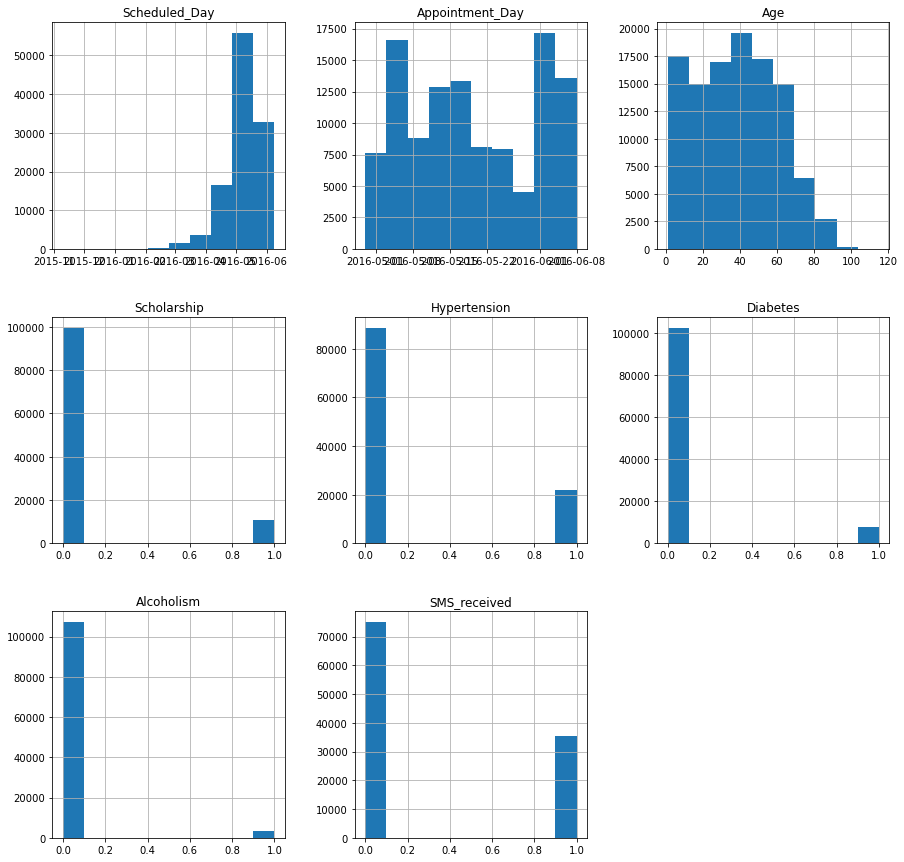

In [396]:
# Plot histogram of all variables
df.hist(figsize= (15,15));

- Histogram of numerical variables

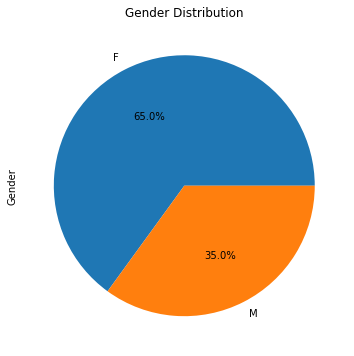

In [397]:
# Exploring gender

df.Gender.value_counts().plot(kind='pie', figsize=(6,6), autopct='%.1f%%');
plt.title("Gender Distribution");


- About 65% of the sample population are female 

Text(0, 0.5, 'Neighbourhood')

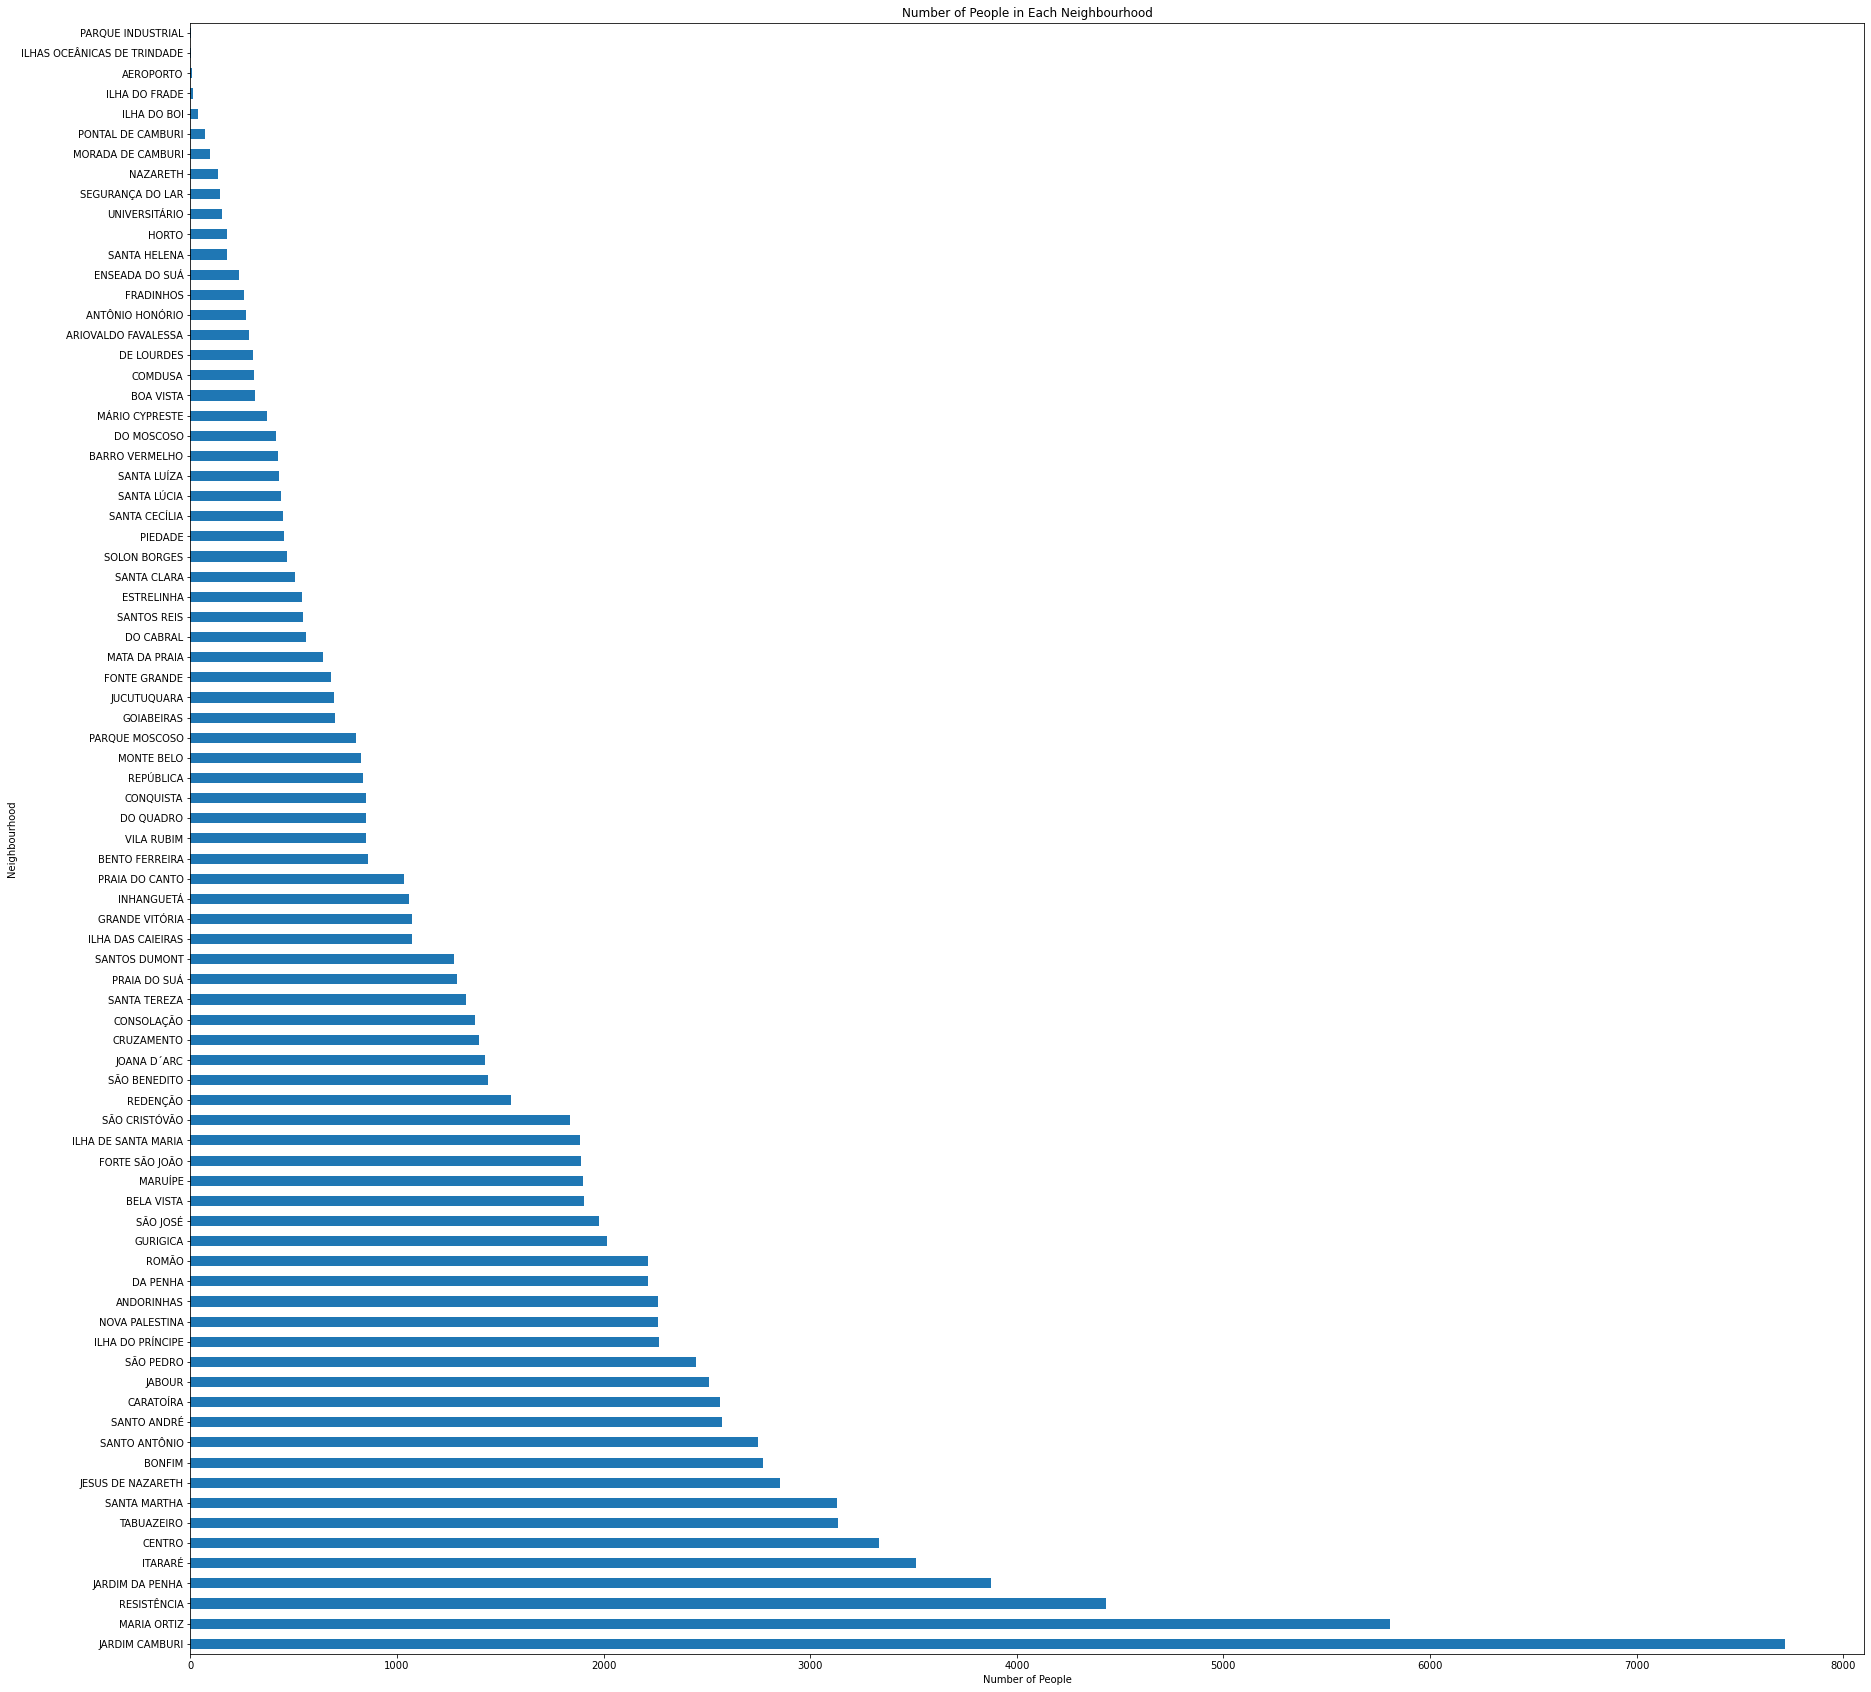

In [398]:
# Exploring Neighboorhood


df.Neighbourhood.value_counts().plot(kind='barh', figsize=(30,30));
plt.title("Number of People in Each Neighbourhood")
plt.xlabel("Number of People")
plt.ylabel("Neighbourhood")

- Jardim Camburi Neighbourhood has the highest number of people seeking appointments, while Park Industrial has the least

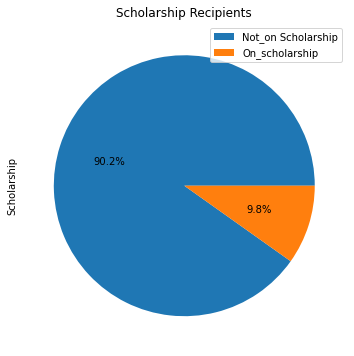

In [399]:
# Exploring Scholarship

df.Scholarship.value_counts().plot(kind='pie', figsize=(6,6), labels=None , autopct='%.1f%%');
plt.title("Scholarship Recipients")
plt.legend(['Not_on Scholarship','On_scholarship']);

- Only about 10% of the population are on scholarship( financial aid)

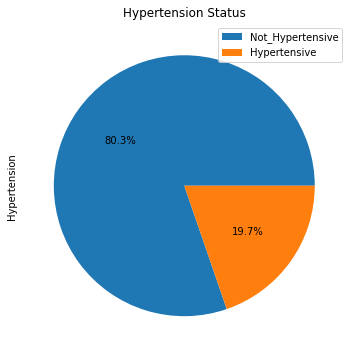

In [400]:
# Exploring Hypertension

df.Hypertension.value_counts().plot(kind='pie', figsize=(6,6), labels=None,   autopct='%.1f%%');
plt.title('Hypertension Status')
plt.legend(['Not_Hypertensive','Hypertensive']);

- About 20% of the population are hypertensive

Text(0, 0.5, 'Number')

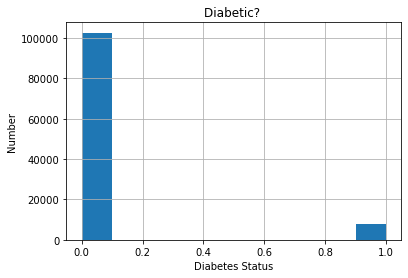

In [401]:
# Exploring Diabetes

df.Diabetes.hist();
plt.title("Diabetic? ")
plt.xlabel("Diabetes Status")
plt.ylabel("Number")


- Histogram showing that only a small proportion of the population is Diabetic

Text(0, 0.5, 'Number')

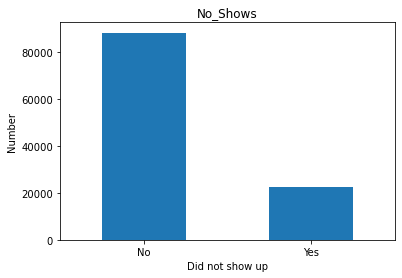

In [402]:
# Exploring No_show

df.No_show.value_counts().plot(kind='bar', rot=0)
plt.title("No_Shows")
plt.xlabel("Did not show up")
plt.ylabel("Number")

- Bar Chart showing that most people showed up for their appointments

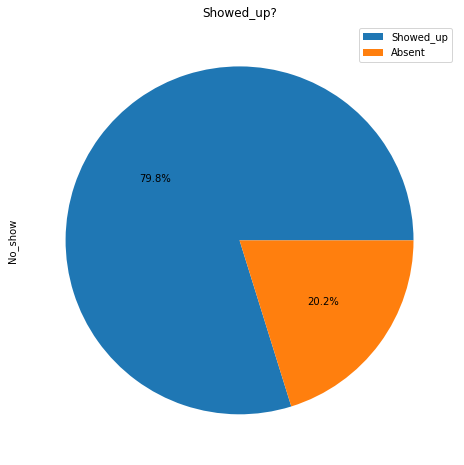

In [403]:
# Exploring No_show

df.No_show.value_counts().plot(kind='pie', figsize=(8,8), labels=None, autopct='%.1f%%');
plt.title('Showed_up?')
plt.legend(['Showed_up','Absent']);

- About 80% of the population showed up for their appointments

**REMINDER ON THE RESEARCH QUESTION**

What factors should we consider that might predict if a patient will show up for an appointment or not?

   > Subquestions:
   * What is the relationship between these factors and patients showing up?
   * What factor(s) have the greatest influence on showing up?
   * What factor(s) show no direct correlation with showing up?


**APPROACH TO QUESTION**

- To explore this data to answer the research question , 'No_show' would be the dependent variable while 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism' and 'SMS_received' would be the independent variables
- The Scheduled_Day and Appointment_Day columns will also be worked on to derive an Appointment_gap varaible that would also be explored as relating with No_Show variable

In [404]:
# Creating masks for the two possibilities for the dependent variable- No_show

showed_up = df.No_show == 'No'
absent = df.No_show == 'Yes'


**Exploring the relationship between AGE and No_show**







In [405]:
# Exploring Age:

# Check the mean age of people who showed up
df.Age[showed_up].mean()

39.00986105668502

In [406]:
# Check the mean age of people who did not show up

df.Age[absent].mean()


35.379532712993374

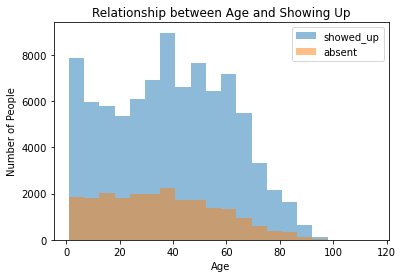

In [407]:
# Plot histogram to compare the age data

plt.hist( df.Age[showed_up], alpha=0.5, bins=20, label='showed_up')   # or df.Age[showed_up].hist(alpha=0.5, bins=20, label='showed_up')
plt.hist( df.Age[absent], alpha=0.5, bins=20, label='absent')   # or df.Age[absent].hist(alpha=0.5, bins=20, label='absent')
plt.title("Relationship between Age and Showing Up")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend();



In [408]:
# Creating a custom function 'histplot' to create histogram plots

def histplot (a, b, c):
    'to plot a histogram '
    plt.hist( df[a][b], alpha=0.5, bins=20, label='showed_up')
    plt.hist( df[a][c], alpha=0.5, bins=20, label='absent')
    plt.title("Relationship between " + a + " and Showing Up")
    plt.xlabel(a)
    plt.ylabel("Number of People")
    plt.legend();

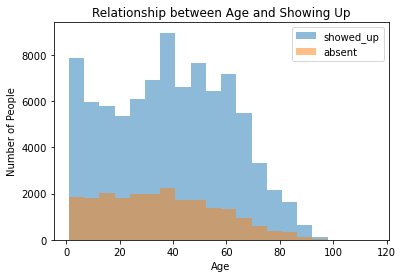

In [409]:
# Plotting histogram of Age distribution and how they showed up using 'histplot function'

histplot ( 'Age', showed_up, absent)

- There seems to be no direct relationship between the age distribution and the citizens showing up for appointments as across all ages more people showed up than those who did not

**Exploring the relationship between Gender and No_show**





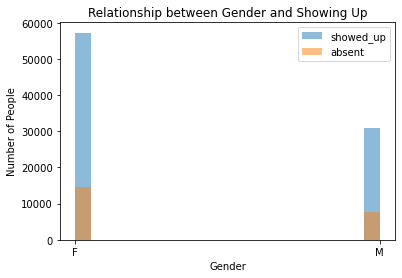

In [410]:
# Gender
# Using the custom 'histplot' function to create an histogram showing the relationship between Gender and showing up

histplot ( 'Gender', showed_up, absent)

- This shows that there are more females who showed up than males
- However , there are more females in the sample population , so proportions would give a better impression of performance


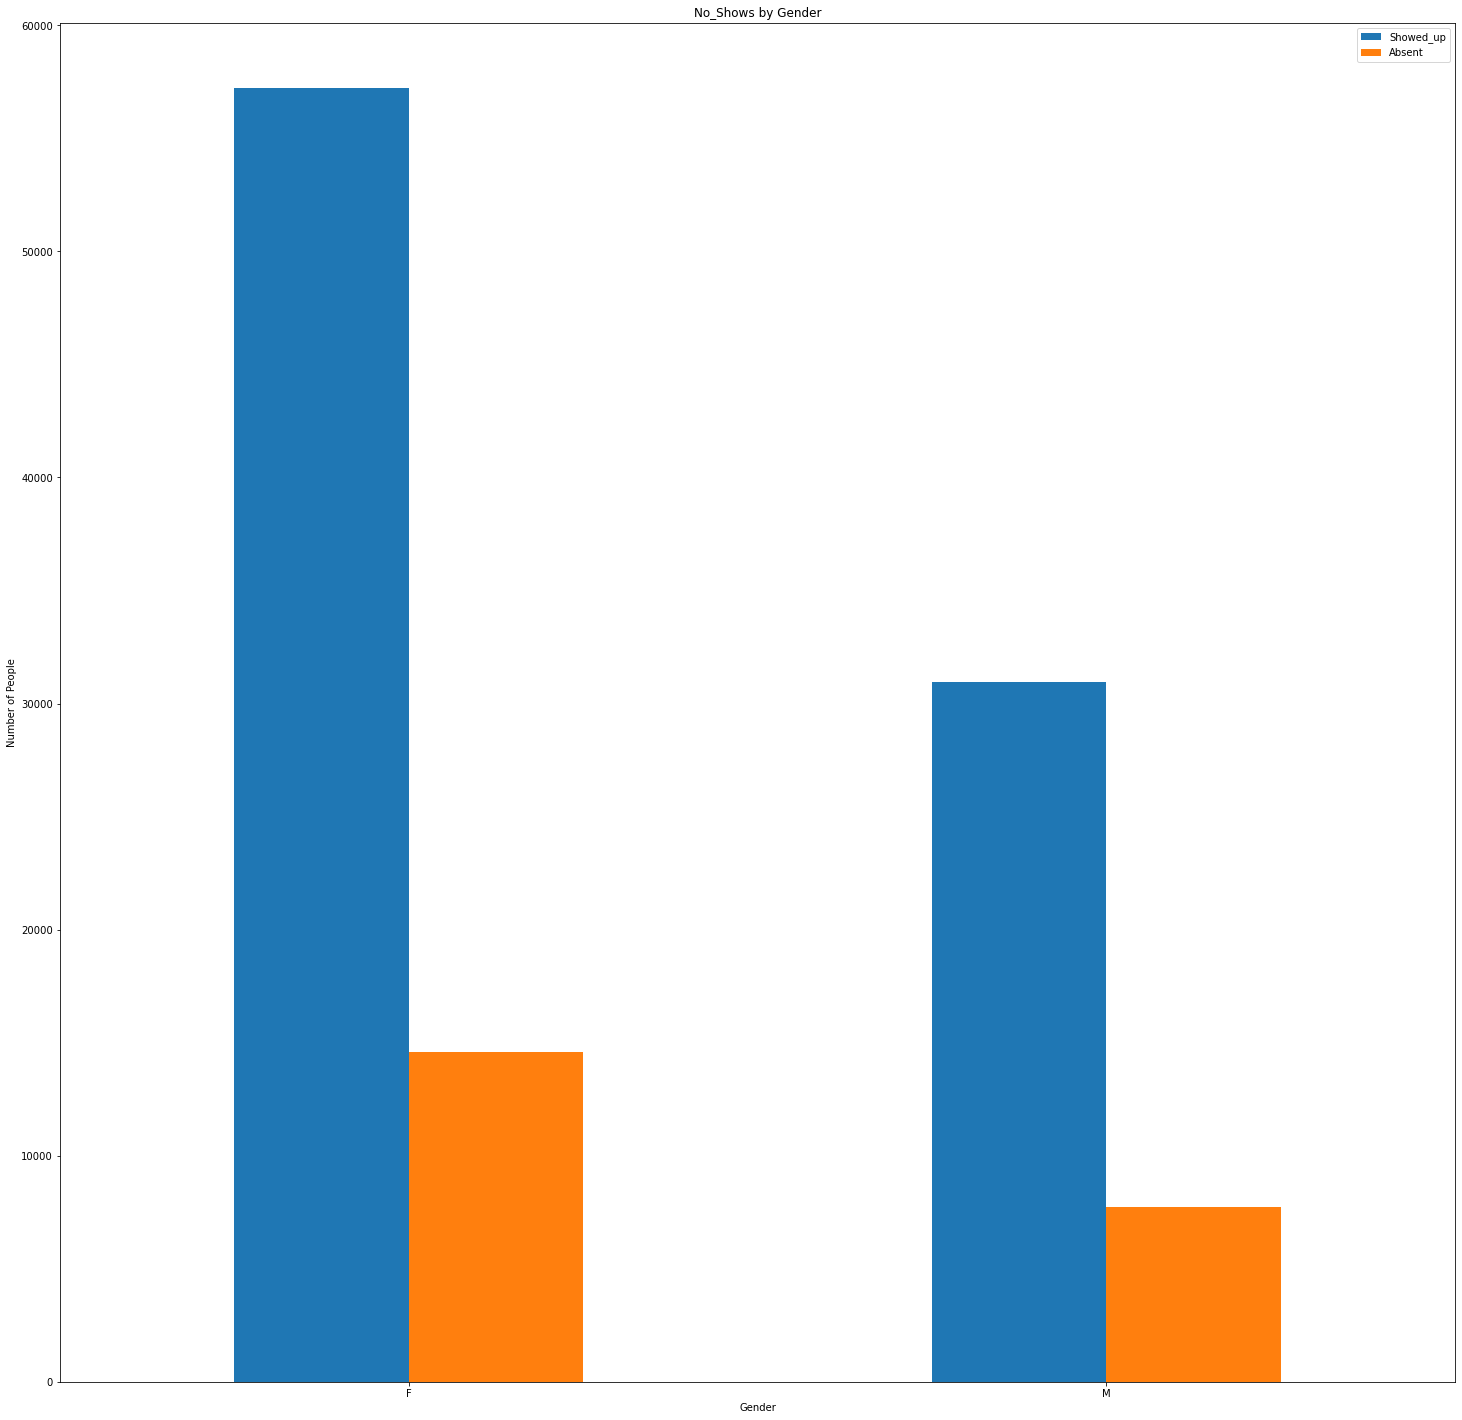

In [411]:
# Clustered bar chart for the above

df.groupby('No_show')['Gender'].value_counts().unstack(0).plot(kind='bar', rot=0, figsize=(25,25))
plt.title("No_Shows by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(['Showed_up','Absent']);

In [412]:
# Creating a custom defined 'clustbar' function to plot similar bar charts
# Defining the function

def clustbar (a, b):
    df.groupby(a)[b].value_counts().unstack(0).plot(kind='bar', rot=75, figsize=(25,25))
    plt.title(a + ' by ' + b)
    plt.xlabel(b)
    plt.ylabel("Number of People")
    plt.legend(['Showed_up','Absent']);

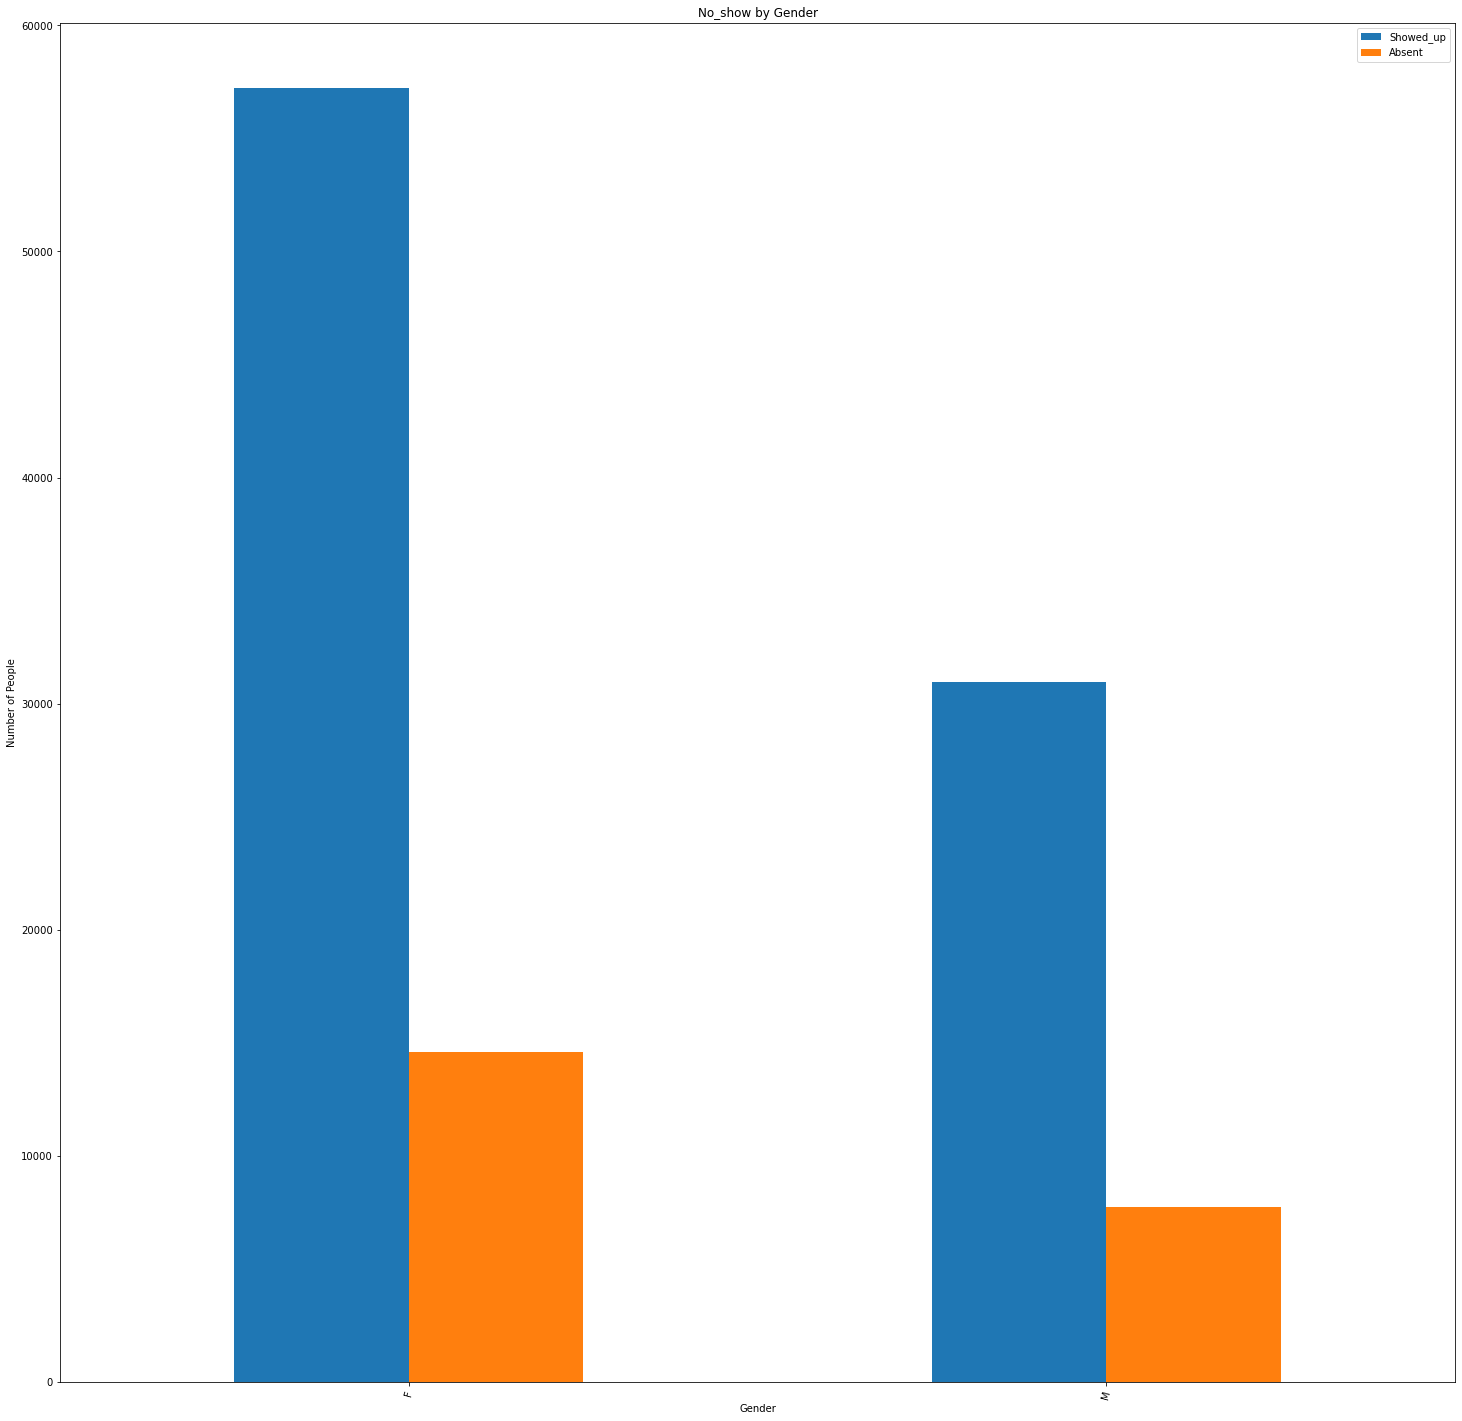

In [413]:
# Using the function

clustbar ('No_show', 'Gender')

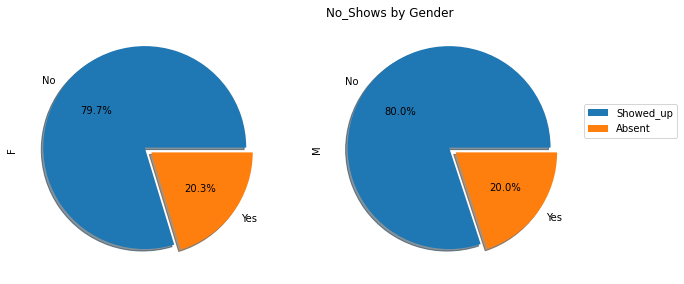

In [414]:
# Pie charts showing proportions;

df.groupby('Gender')['No_show'].value_counts().unstack(0).plot(kind='pie', subplots=True, figsize=(10,5), autopct='%1.1f%%', shadow=True, explode=[0.04, 0.04], legend=0)
plt.title("No_Shows by Gender", loc='left')
plt.legend(['Showed_up','Absent'], bbox_to_anchor=(1, 0.7));

In [415]:
# Creating custom function 'piechart' for Pie Charts showing proportions

def piechart (a,b):
    df.groupby(a)[b].value_counts().unstack(0).plot(kind='pie', subplots=True, figsize=(10,5), autopct='%1.1f%%', shadow=True, explode=[0.04, 0.04], legend=0)
    plt.title(a +' by '+ b, loc='left')
    plt.legend(['Showed_up','Absent'], bbox_to_anchor=(1, 0.7));


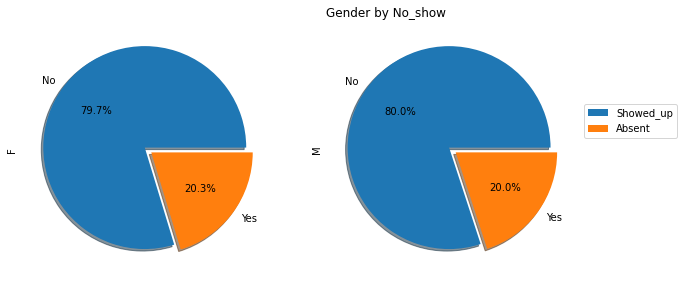

In [416]:
# Using the custom 'piechart' function to create pie charts showing proportions

piechart ('Gender', 'No_show')

- The percentage of people who showed up is almost same (80%) for both genders. This possibly suggests that the Gender had no direct relationship with showing up

In [417]:
# Compare Gender with age

df.query('Gender == "F"')['Age'].median(), df.query('Gender == "M"')['Age'].median()

(39.0, 37.0)

- The median age for both genders has just a little difference

In [418]:
# Checking Dataframe head again to aid exeploration
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No


**Exploring the relationship between Neighbourhood and No_show**

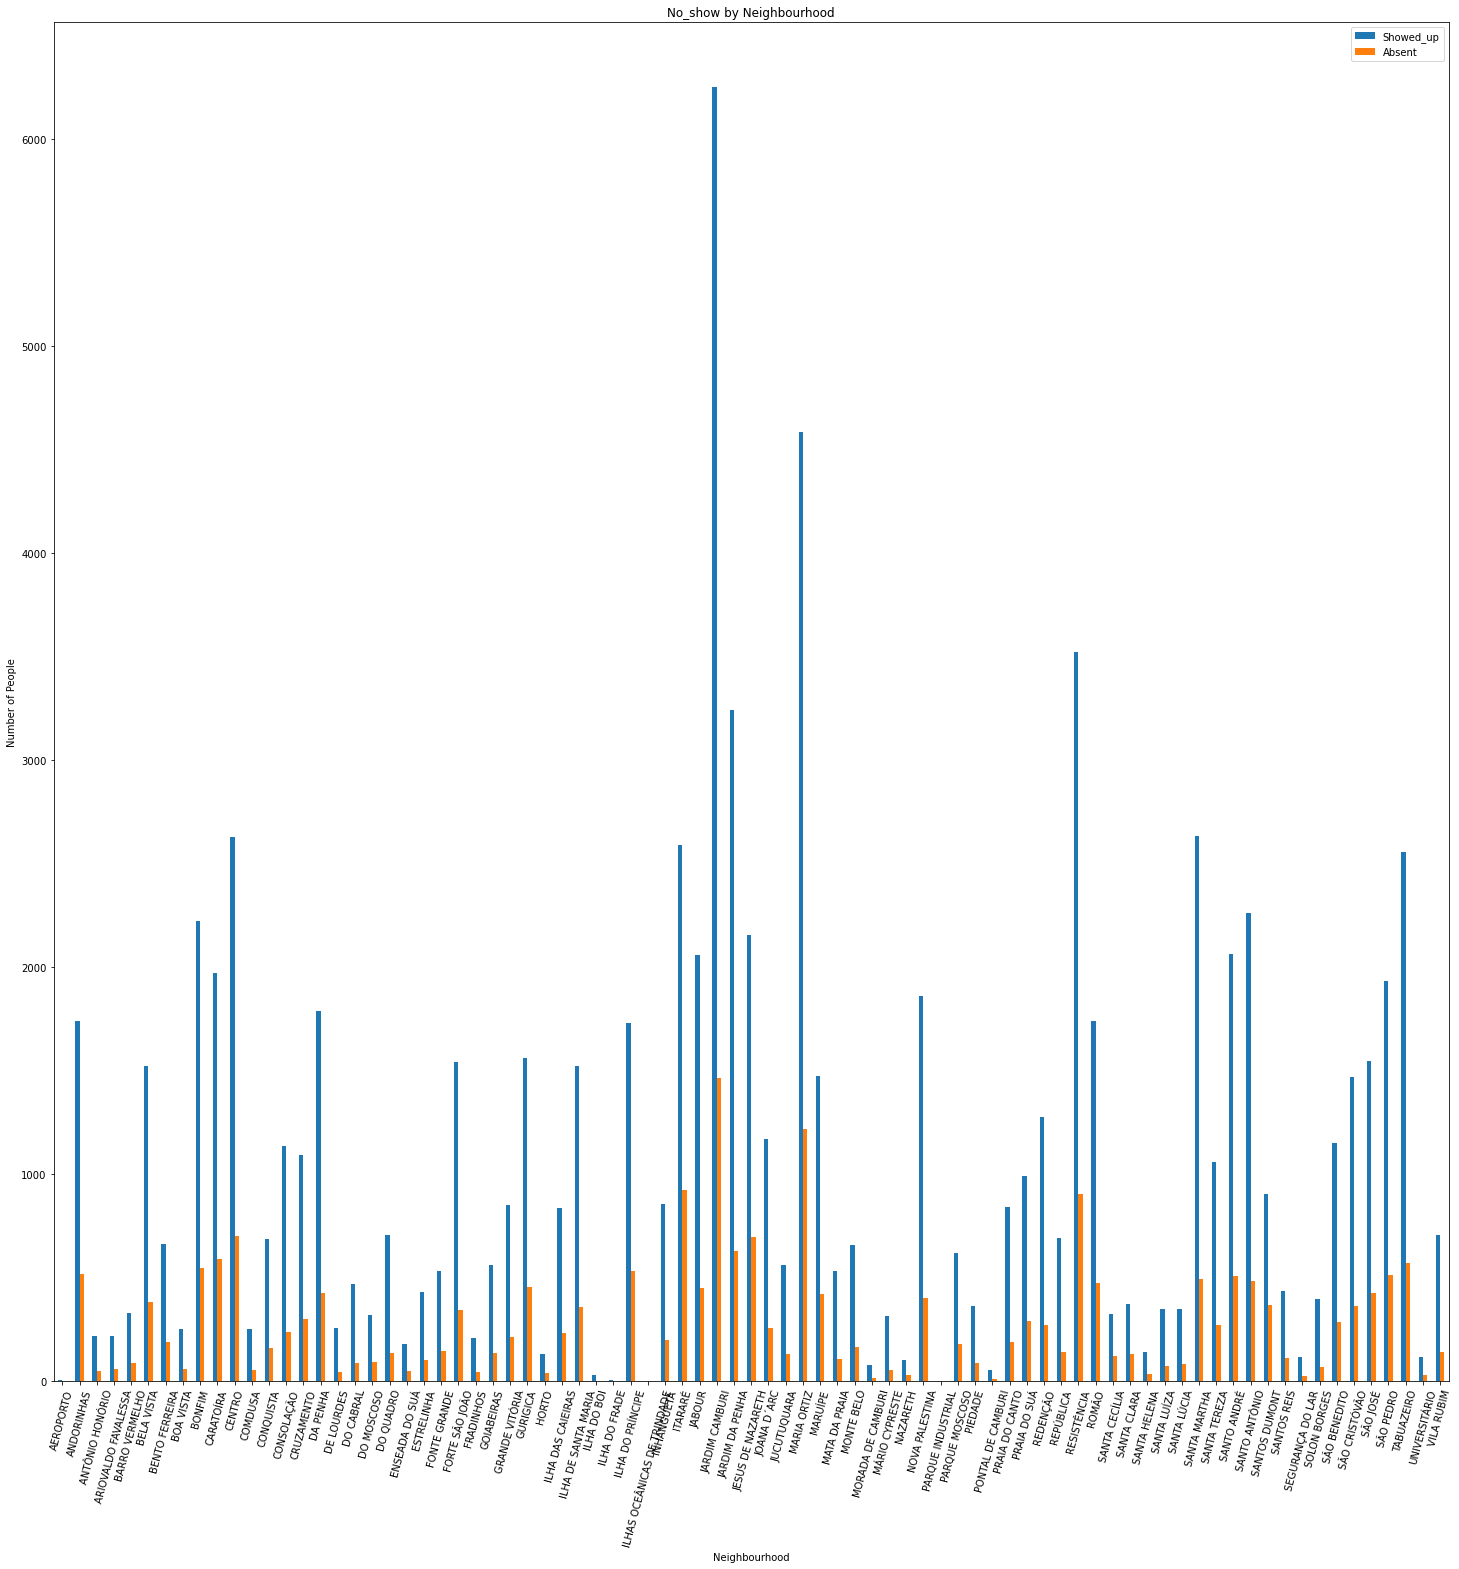

In [419]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'Neighbourhood'

clustbar ('No_show', 'Neighbourhood')

- Jardim Camburi Neihgbourhood has the hihgest number of people who showed up and those whowere absent


**Exploring the relationship between Scholarship and No_show**




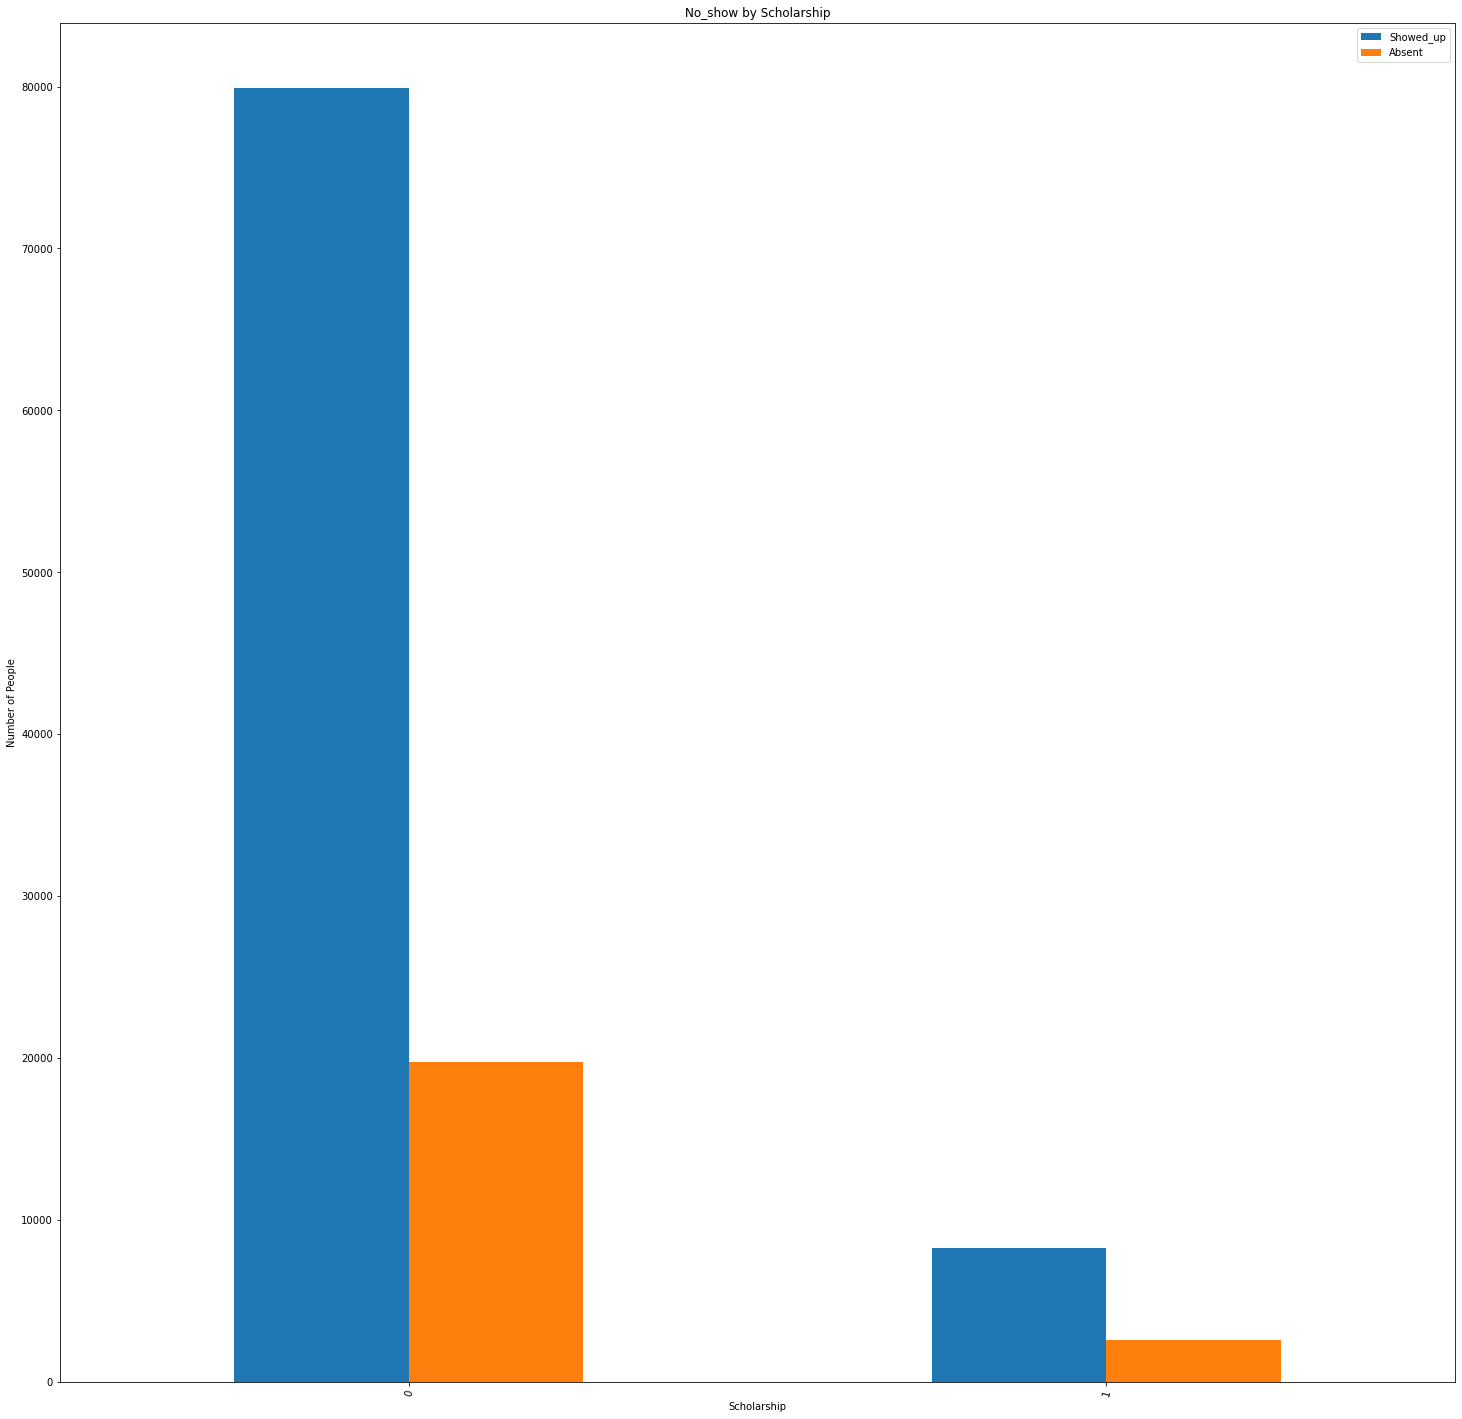

In [420]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'Scholarship'

clustbar ('No_show', 'Scholarship')


- The bar chart revealed that most people are not on scholarship 
- Most of those not on scholarship howed up for their appointment

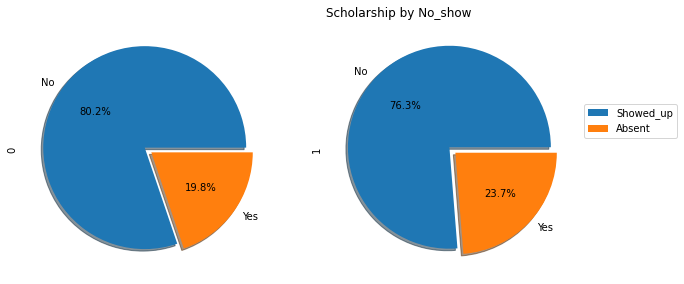

In [421]:
# Plot pie chart of 'No_show'  by 'Scholarship' using custom 'piechart' function

piechart ('Scholarship', 'No_show')

- As the difference in proportion of peopleof those who showed up with or without Scholarship is minimal, scholarship does not seem to have a strong direct relationship with showing up

**Exploring the relationship between Hypertension and No_show**




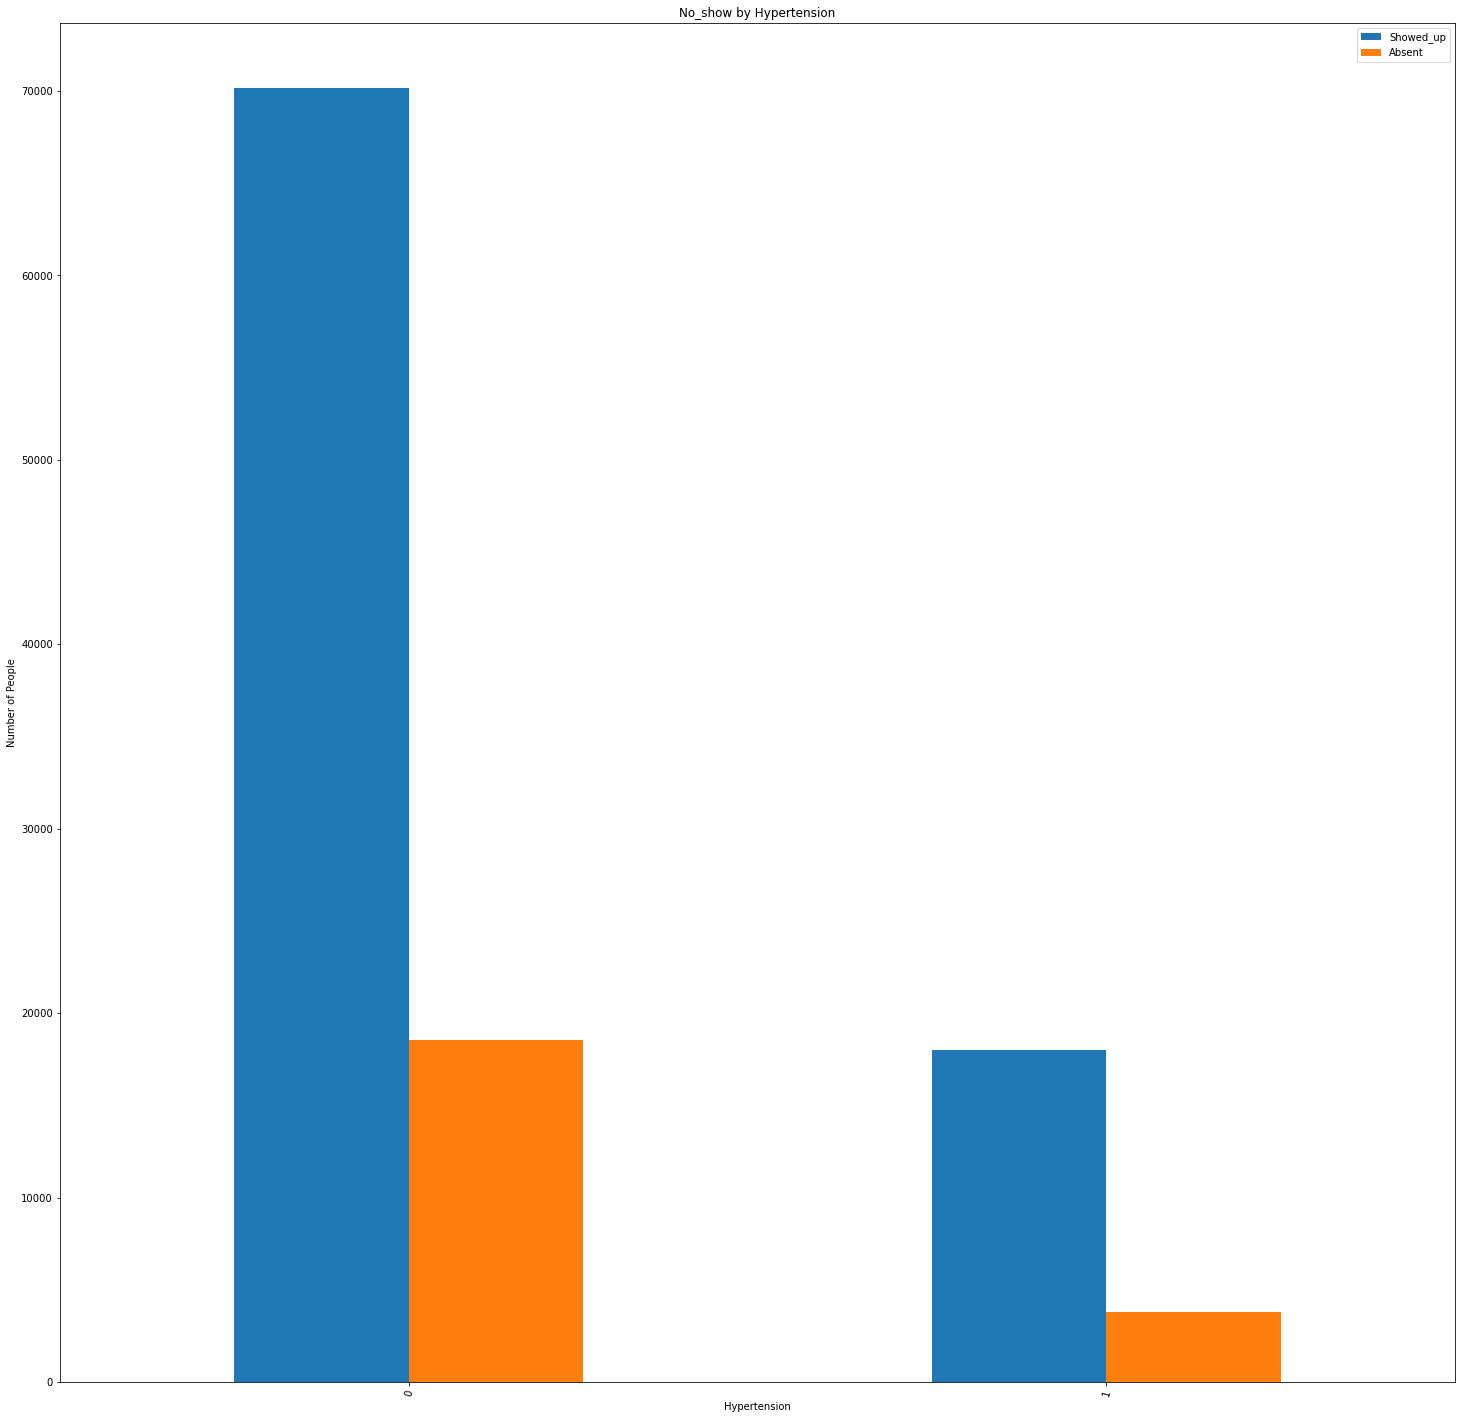

In [422]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'Hypertension'

clustbar ('No_show', 'Hypertension')

- More people without hypertension showed up

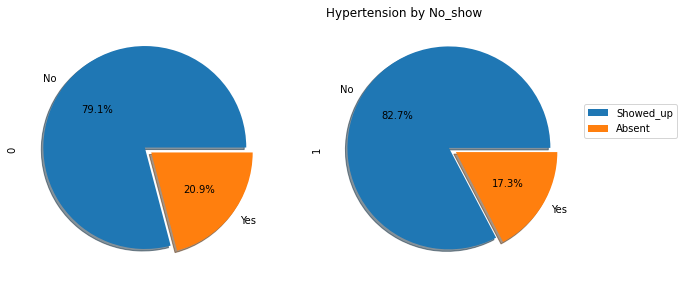

In [423]:
# Plot pie chart of 'Hypertension' by 'No_show' using custom 'piechart' function

piechart ('Hypertension', 'No_show')


- There seems to be no direct relationship between the citizen's hypertensive state and showing up

**Exploring the relationship between Diabetes and No_show**


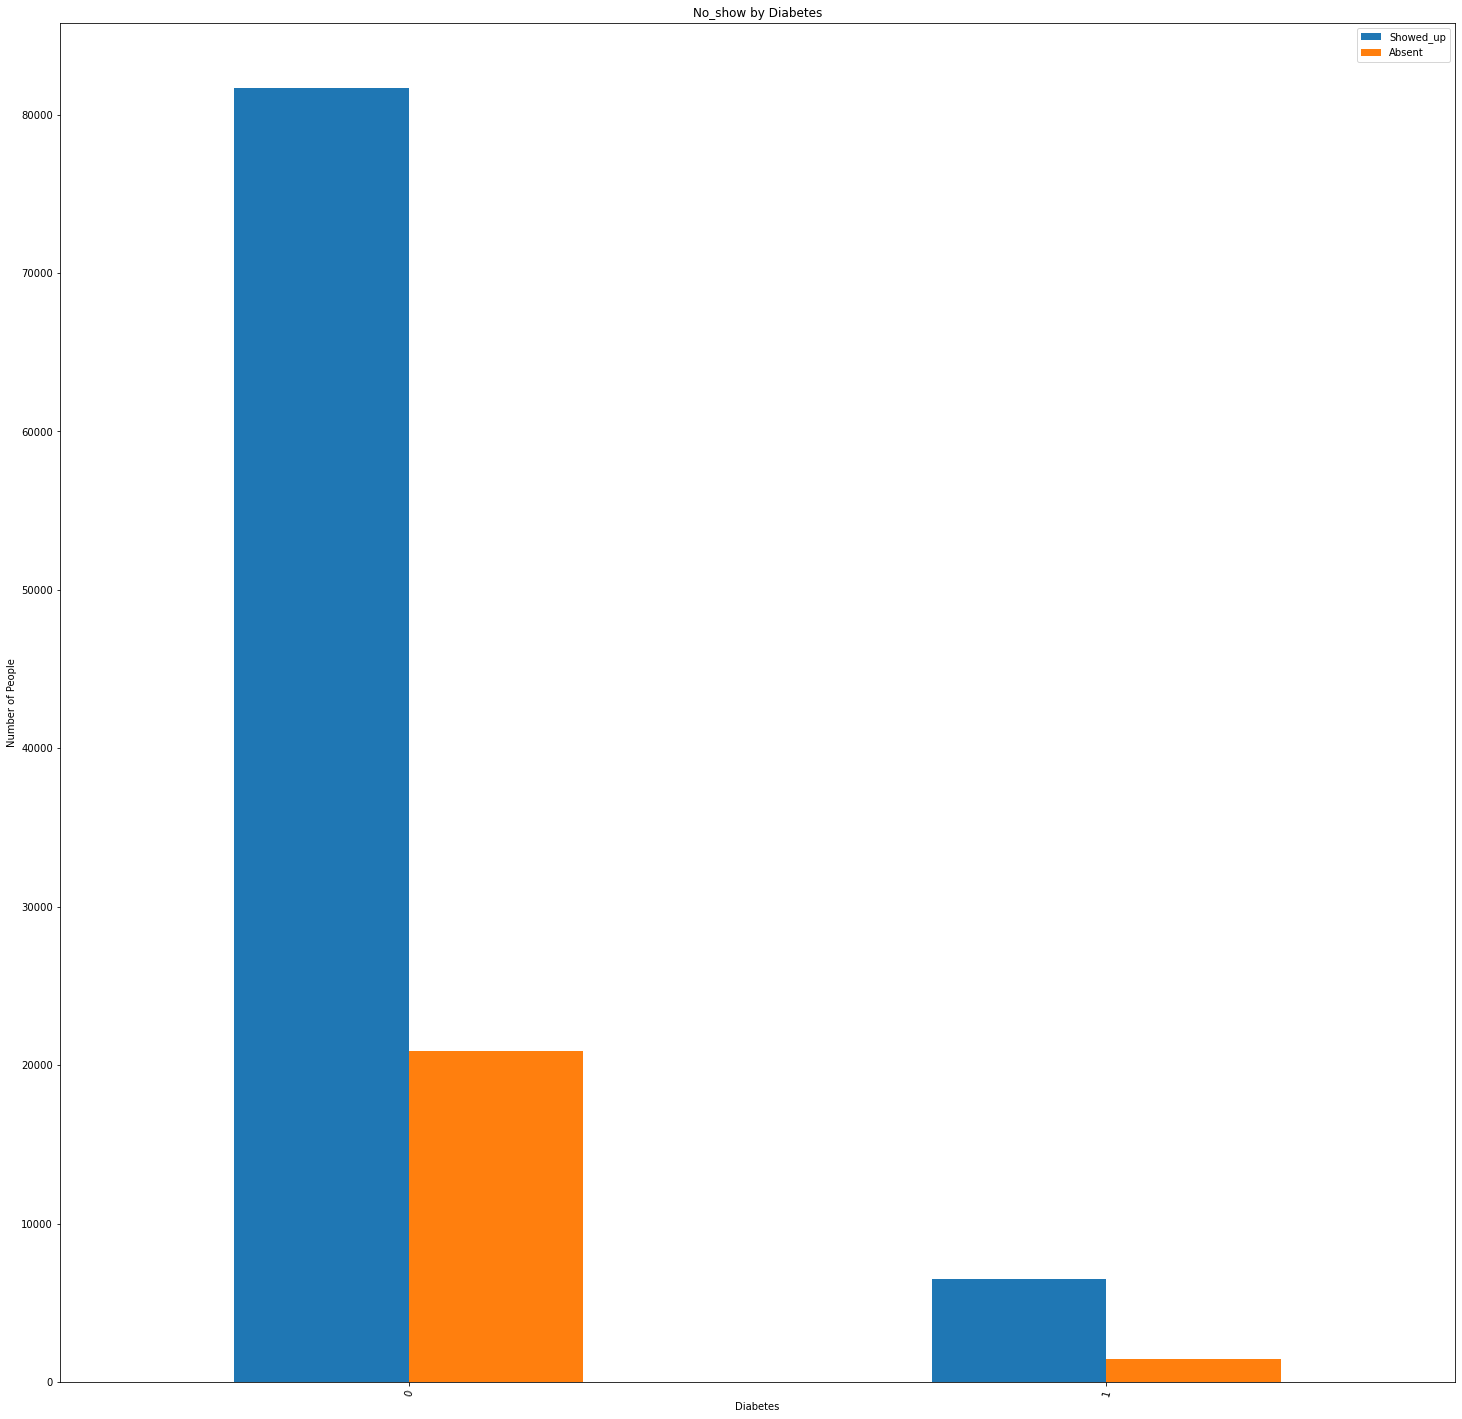

In [424]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'Diabetes'

clustbar ('No_show', 'Diabetes')

- The bar chart showed that more people were without diabetes and most of those without diabetes showed up

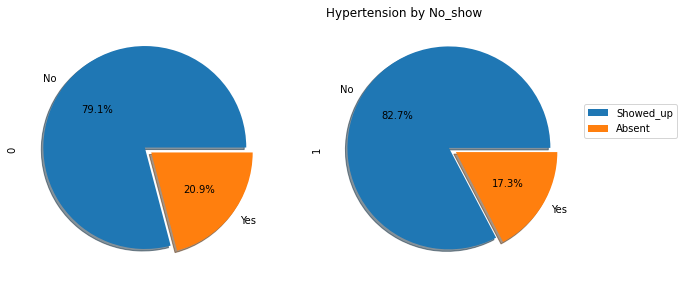

In [425]:
# Plot pie chart of 'Diabetes' by 'No_show' using custom 'piechart' function

piechart ('Hypertension', 'No_show')

- The pie chart shows minimal difference in proportions. There seems to be no direct relationship between the diabetic status of the patient and showing up

**Exploring the relationship between Alcoholism and No_show**


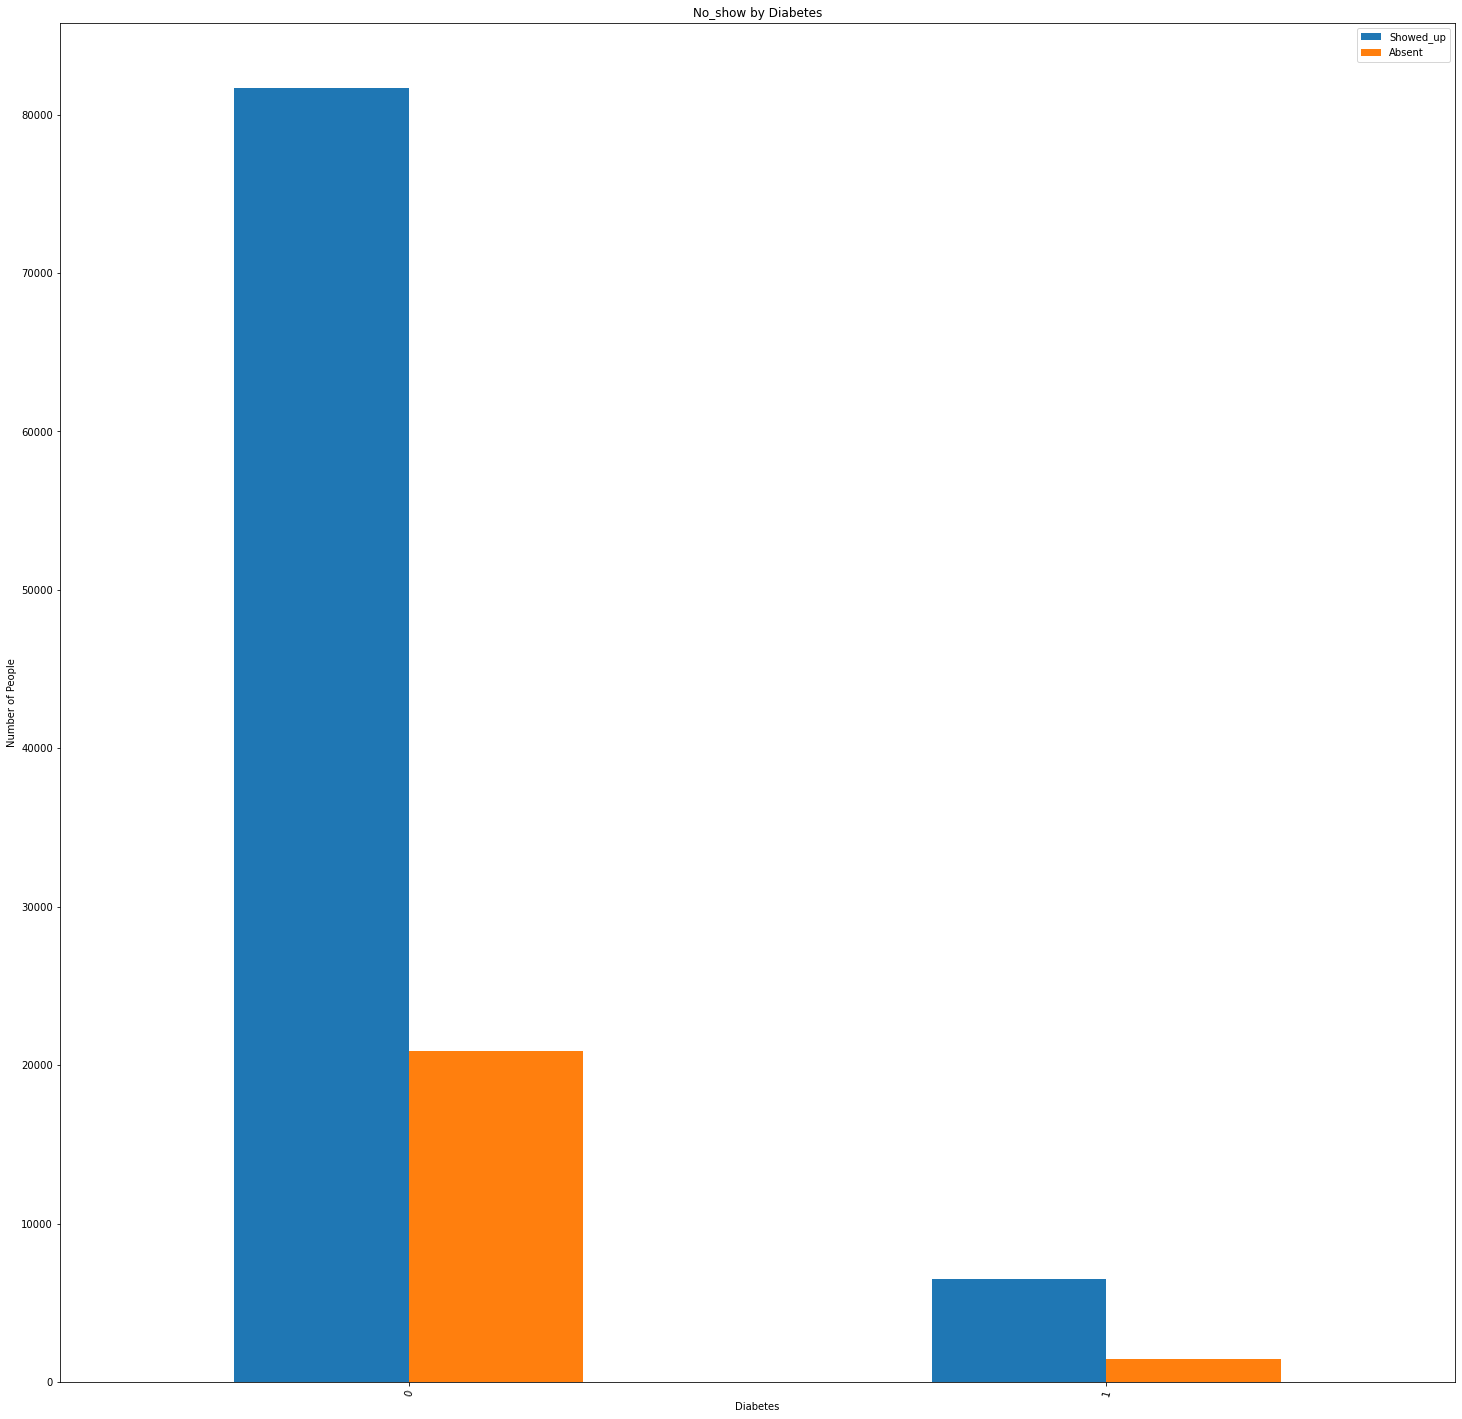

In [426]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'Alcoholism'

clustbar ('No_show', 'Diabetes')


- The chart reveals that more people were non-alcoholics, and most of these people made their appointments

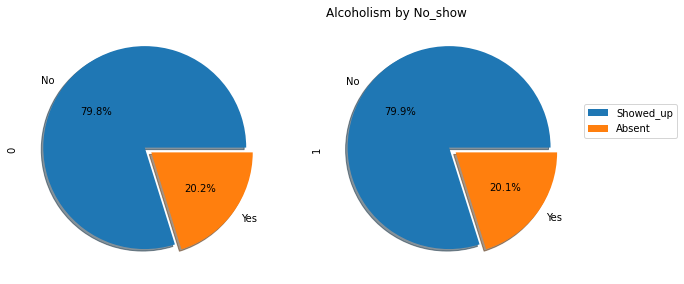

In [427]:
# Plot pie chart of 'Alcoholism' by 'No_show' using custom 'piechart' function

piechart ('Alcoholism', 'No_show')


- The pie charts shows similar ratios. There seems to be no direct relationship between Alcoholism and showing up

**Exploring the relationship between SMS_Received and No_show**

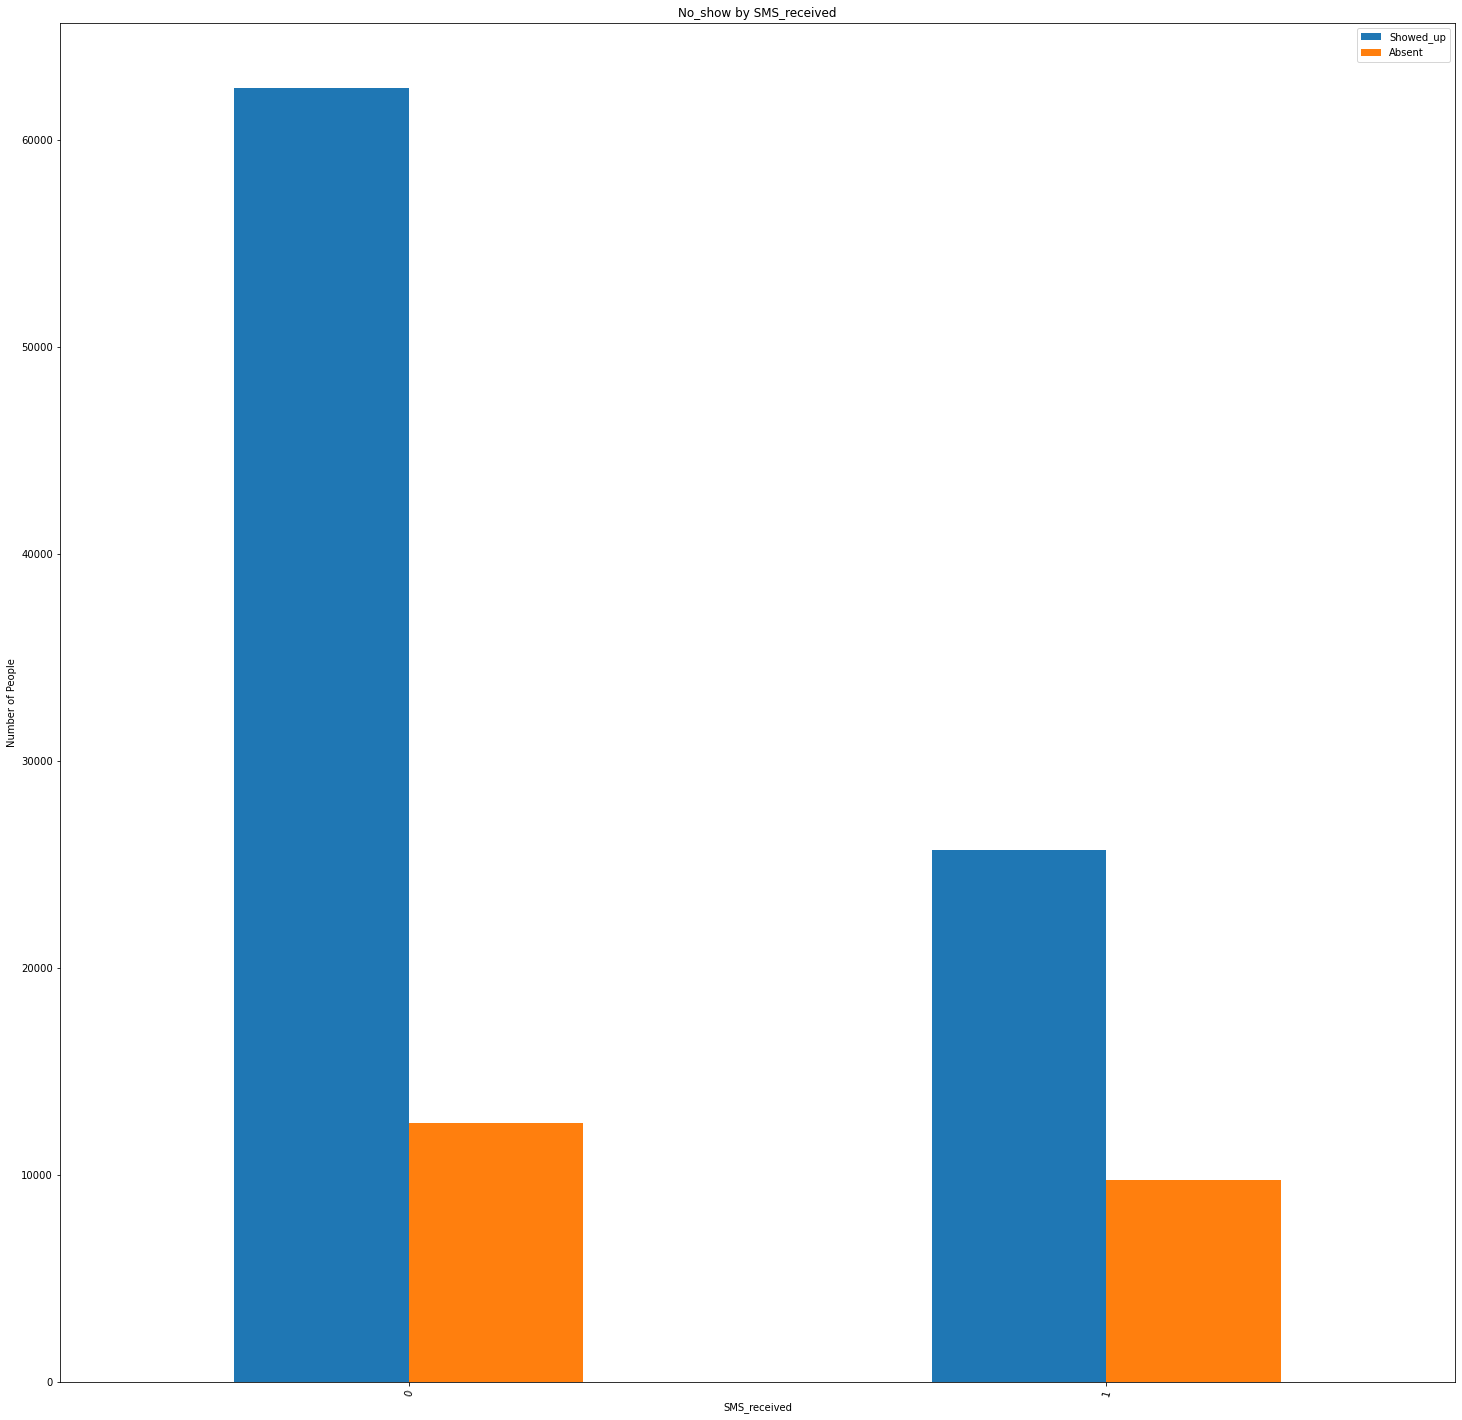

In [428]:
# Using custom 'clustbar' function to create bar chart to explore the relationship between 'No_show' and 'SMS_received'

clustbar ('No_show', 'SMS_received')

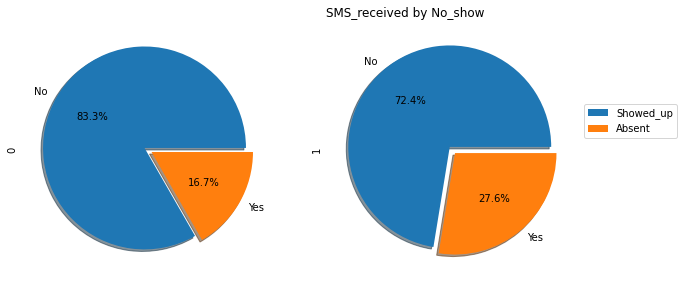

In [429]:
# Plot pie chart of 'SMS_received' by 'No_show' using custom 'piechart' function

piechart ('SMS_received', 'No_show')

- A liitle more proportion of the people that did not receive messages showed up compared to the proportion of those who turned up amognst those who received texts

**Exploring the relationship between 'Appointment_gap' and No_show**

In [430]:
# A new column called 'Appointment_gap' will be created

# 'Appointment_gap' will be derived from difference in time between 'Scheduled_Day' and 'Appointment_Day' columns


df['Appointment_gap']= (df['Appointment_Day'] - df['Scheduled_Day'])

df.head()
   
   

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show,Appointment_gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No,-1 days +07:52:37


- 'Appointment_gap' has been added as a new column
- The first few columns reveals an issue with the values(negative values). This will be explored

In [431]:
df.Appointment_gap.unique()

array([ -67088000000000,  -58107000000000,  -58744000000000, ...,
       3484568000000000, 3487837000000000, 3493744000000000],
      dtype='timedelta64[ns]')

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Gender           110527 non-null  object             
 1   Scheduled_Day    110527 non-null  datetime64[ns, UTC]
 2   Appointment_Day  110527 non-null  datetime64[ns, UTC]
 3   Age              110527 non-null  float64            
 4   Neighbourhood    110527 non-null  object             
 5   Scholarship      110527 non-null  int64              
 6   Hypertension     110527 non-null  int64              
 7   Diabetes         110527 non-null  int64              
 8   Alcoholism       110527 non-null  int64              
 9   SMS_received     110527 non-null  int64              
 10  No_show          110527 non-null  object             
 11  Appointment_gap  110527 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(3)

- The 'Appointment_gap' Datatype is timedelta64[ns]. This also needs to be addressed

In [433]:
# Changing the unit from nanoseconds to Days

df.Appointment_gap = df.Appointment_gap.astype('timedelta64[D]')

- The datatype has been changed to units in days

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Gender           110527 non-null  object             
 1   Scheduled_Day    110527 non-null  datetime64[ns, UTC]
 2   Appointment_Day  110527 non-null  datetime64[ns, UTC]
 3   Age              110527 non-null  float64            
 4   Neighbourhood    110527 non-null  object             
 5   Scholarship      110527 non-null  int64              
 6   Hypertension     110527 non-null  int64              
 7   Diabetes         110527 non-null  int64              
 8   Alcoholism       110527 non-null  int64              
 9   SMS_received     110527 non-null  int64              
 10  No_show          110527 non-null  object             
 11  Appointment_gap  110527 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(2), int64(5), object(3)

In [435]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show,Appointment_gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No,-1.0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No,-1.0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No,-1.0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No,-1.0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No,-1.0


In [436]:
# Checking all the unique values in 'Appointment_gap'

df.Appointment_gap.unique()

array([ -1.,   1.,   2.,   0.,   3.,   8.,  28.,   9.,  22.,  10.,  17.,
        16.,  13.,  27.,  23.,  20.,  14.,  15.,  21.,  42.,  29.,  30.,
        41.,  31.,  55.,  44.,  45.,  38.,  36.,  37.,  43.,  49.,  59.,
        51.,  52.,  64.,  66.,  90.,  65.,  83.,  77.,  86., 114., 108.,
        62.,  69.,  71.,  56.,  57.,  50.,  58.,  40.,  48.,  72.,  63.,
        19.,  32.,  33.,   5.,  34.,  35.,  11.,  12.,  39.,  46.,   7.,
         4.,   6.,  24.,  25.,  47.,  26.,  18.,  60.,  54.,  61., 175.,
        53.,  76.,  68.,  82.,  75.,  88.,  80., 102.,  78.,  67.,  74.,
        84., 111.,  -2.,  79.,  85.,  97.,  93., 141., 154., 161., 168.,
       103., 132., 124.,  95.,  87.,  89., 150., 125., 126., 110., 118.,
        73.,  70.,  81., 107., 109., 101., 121., 100., 104.,  91.,  96.,
        92., 106.,  94.,  -7., 138., 131., 178., 116., 145., 122.])

- The unusual appointment_gap values are -1, -2, -7
- Value 0 will be left unchanged and interpreted as same day appointments

In [437]:
df[df['Appointment_gap'] == -1 ].count()

Gender             38563
Scheduled_Day      38563
Appointment_Day    38563
Age                38563
Neighbourhood      38563
Scholarship        38563
Hypertension       38563
Diabetes           38563
Alcoholism         38563
SMS_received       38563
No_show            38563
Appointment_gap    38563
dtype: int64

- The unusual values -1, -2 and -7 will be replaced with the mean value

In [438]:
# Finding the mean

df.Appointment_gap.mean()

9.183701719941734

In [439]:
# Replacing unusual values(-1,-2,-7) of appointment gap with mean

df.Appointment_gap.replace([ -1, -2, -7], df.Appointment_gap.mean(), inplace=True)

In [440]:
# Checking data head for replacement

df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No_show,Appointment_gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,No,9.183702
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,No,9.183702
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,No,9.183702
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,No,9.183702
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,No,9.183702


- The first few values of the 'Appointment_gap' shows that the values have been replaced

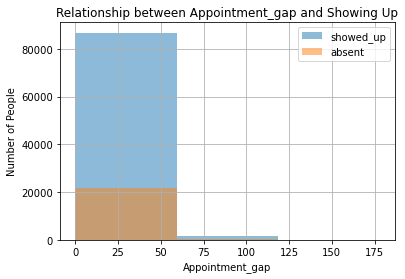

In [441]:
# Plot histogram to compare the Appointment_gap data

# The histogram is plotted with masks for the two main categories of appointments created ealier from the No_show column.
# showed_up- mask with No_show values as 'No'
# absent- mask with No_show values as 'Yes'

df.Appointment_gap[showed_up].hist(alpha=0.5, bins=3, label='showed_up')
df.Appointment_gap[absent].hist(alpha=0.5, bins=3, label='absent')
plt.title("Relationship between Appointment_gap and Showing Up")
plt.xlabel("Appointment_gap")
plt.ylabel("Number of People")
plt.legend();

- The histogram shows that most of the appointments were scheduled about 60 days and below to their appointment date
- Over 70% of the scheduled appointments with gaps of 60 days and below showed up.
- This suggests a possible positive relationship between shorter appointment gaps and showing up

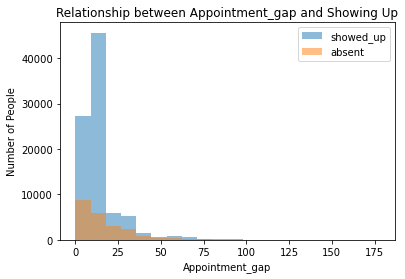

In [442]:
# Plotting histogram of Age distribution and how they showed up using 'histplot function'

histplot ( 'Appointment_gap', showed_up, absent)

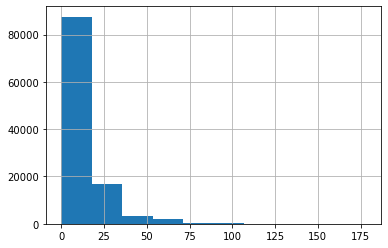

In [443]:
df.Appointment_gap.hist();

In [444]:
# Checking summary statistics of the data

df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Appointment_gap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.321026,12.737358
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.466873,13.560801
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,9.183702
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


- The minimum Appointment_gap is seen as 0, mean is 12.7 and max is 178 days

<a id='conclusions'></a>
## Conclusions


**Research Question**

What factors should we consider that might predict if a patient will show up for an appointment or not?

Possible Subquestions:
- What is the relationship between these factors and patients showing up?
- What factor(s) have the greatest influence on showing up?
- What factor(s) show no direct correlation with showing up?


**Summary of Findings**
* The data consists of over 100,000 apointments and several variables. The variables included the No_show variable which revealed if they showed up for their scheduled appointments or not
* There are 110527 rows and 14 variables entered into columns
* There are 62299 patients who scheduled the appointments
* There are 81 locations where the appointments took place
* The research question was to identify possible factors that affected if they showed up or not
* From the variables which were explored (including - Gender, Age, Scholarship , Hypertension, Diabetes, SMS_received, Alcoholism and Neighbourhood), there seems to be no relationship between these factors and the patients showing up for their appointment

**Response to Research question**
- Only the appointment gap showed any possible influence on showing up. 
- It gave a possible suggestion that lesser appointment gaps might be related with increased chances of showing up.


**Where additional research can be done**
* Additional research can be done on the reason for scheduling the visits and this can be explored to see if it has any correlation with showing up
* Proper use of better analytics methods can be used to address inappropriate data and in using predictive analytics to find correlations


**Where additional information can be useful**
* Appropriate description of the columns and their unique values would help avoid any misinterpretation of the data
* This is worthy of note especialy in the 'Handcap' column of the raw data where there are five unique values 0,1,2,3,4 while the data source states the values as True and False


**Limitations**
* The "Age" column had 0s and -1 as values. These had to be replaced with the mean age which is a limitation of the exploration
* The "Handcap" column of the raw data had five unique values (0,1,2,3,4) while the data source states the values are 'True' and 'False'. This column had to be dropped because of this discrepancy. However, if the data was clean , the handicap status is a very valid independent variable that would have been explored as it relates with showing up for scheduled appointments
* The difference between the 'Scheduled_Day' and 'Appointment_Day' had some negative values, suggesting that appointments held before scheduling which is not posible. 






**THANK YOU**